# Modeling Recommendations

## K-Means Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/processed/train_cleaned.csv")

In [3]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [4]:
kmeans.inertia_

582925.3306995389

In [5]:
kmeans.cluster_centers_

array([[ 1.04337099, -0.08194347,  0.13076093,  0.02971964, -0.03597538,
         0.02752738, -0.05624622, -0.07095316, -0.06278535,  0.12392941,
        -0.0468878 , -0.07895866,  0.01392842,  0.07506418, -0.10516523,
        -0.03164713, -0.20132683, -0.57450035, -0.48738336, -0.44015578,
         0.59988855,  0.47073277,  0.61675206,  0.27489774],
       [-0.25887326,  0.06641908, -0.09512484, -0.0256272 ,  0.04528477,
        -0.06679738,  0.10109123,  0.06158478,  0.01280766, -0.14098242,
         0.08225931,  0.13158971, -0.00823743, -0.0299801 ,  0.06903246,
         0.03723716,  0.15283437, -0.57450035,  0.88846684,  0.80237415,
        -0.39595804, -0.31070843, -0.40708885, -0.18144699],
       [-1.30224425,  0.03648253, -0.07372431, -0.01103608, -0.00700222,
         0.05124851, -0.05418798,  0.02577387,  0.08231769,  0.00268519,
        -0.04229973, -0.06133348, -0.0105583 , -0.07747778,  0.0699601 ,
        -0.00244915,  0.10440975,  1.74064299, -0.48738336, -0.44015578,
  

In [6]:
kmeans.n_iter_

24

In [7]:
kmeans.labels_[:5]

array([2, 2, 2, 2, 2])

## Cluster Identification: Elbow Method

In [9]:
# visual for elbow method

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

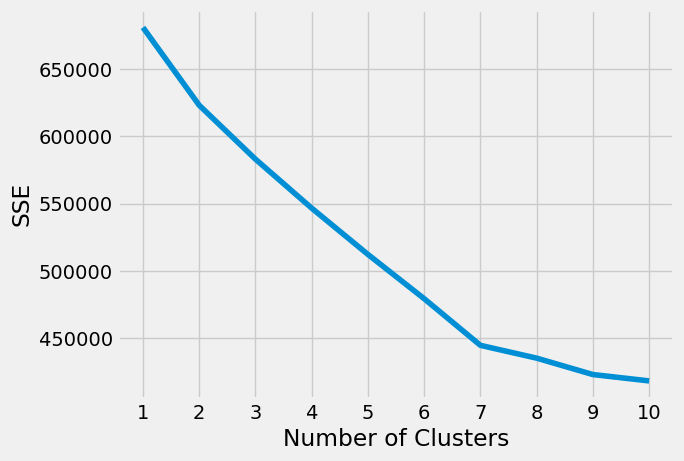

In [10]:
# elbow plot

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow is at 7 clusters.

## Cluster Identification: Silhouette Method

In [11]:
# visual for silhouette method

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

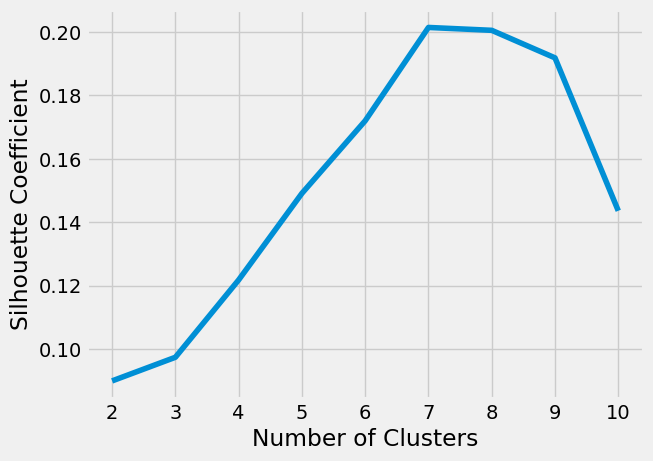

In [12]:
# silhouette plot

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The peak for silhouette is at 7 clusters.

## K-Means #2

In [13]:
kmeans = KMeans(init="random", n_clusters=7, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=7, n_init=10, random_state=42)

In [14]:
orig_df = pd.read_csv("../data/raw/train.csv")

In [15]:
kmeans.labels_[:5]

array([3, 3, 3, 3, 3])

In [17]:
orig_df["cluster"] = kmeans.labels_

orig_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,cluster
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0,3
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0,3
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0,3
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0,3
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0,3


In [18]:
orig_df.to_csv("../data/processed/train_clustered.csv")

## Predicting

### Pre-Processing

In [19]:
rec_df = pd.read_csv("../data/raw/recommend.csv")

In [20]:
selected = ["Unnamed: 0", "artist_name", "track_name", "release_date", "lyrics", "len", "topic"]
df_dropped = rec_df.drop(columns=selected)

# list of genres
genres = ["pop", "country", "blues", "jazz", "reggae", "rock", "hip hop"]

# for loop to transorm each genre into a boolean value in each column
for genre in genres:
    df_dropped[genre] = 0
    df_dropped.loc[(df_dropped["genre"] == genre), genre] = 1

df_genre = df_dropped.drop(columns=["genre"])

In [21]:
df_genre

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,sadness,feelings,age,pop,country,blues,jazz,reggae,rock,hip hop
0,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,...,0.000907,0.018854,0.314286,0,0,0,0,0,1,0
1,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,...,0.001224,0.062092,0.385714,0,0,0,0,1,0,0
2,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,...,0.031571,0.202862,0.428571,1,0,0,0,0,0,0
3,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,...,0.474607,0.002506,0.857143,1,0,0,0,0,0,0
4,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.771429,1,0,0,0,0,0,0
5,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,...,0.001462,0.034645,0.971429,0,0,0,1,0,0,0
6,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,...,0.000675,0.000675,0.285714,0,0,0,0,0,1,0
7,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,...,0.314594,0.001645,0.714286,0,0,1,0,0,0,0
8,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,...,0.001504,0.001504,0.485714,0,1,0,0,0,0,0
9,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,...,0.118886,0.015028,0.157143,1,0,0,0,0,0,0


### Predicting

In [24]:
rec = kmeans.predict(df_genre)

c:\Users\sance\anaconda3\envs\phase1\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [25]:
rec_df["cluster"] = rec
rec_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age,cluster
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286,0
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714,5
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571,3
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143,3
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429,3
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429,2
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714,0
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286,1
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714,5
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143,3


In [27]:
rec_df = rec_df.drop(columns=["Unnamed: 0"])

In [28]:
rec_df.to_csv("../data/processed/recommend_clustered.csv")